In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True)

# Moore's Law

Moore's law states that the number of transistors per square inch on IC doubles approximately every 2 years.
This indicates that the computer power grows exponentially.

The equation for moore's law is as follows:
$$
\begin{equation}
C = C_0r^t \\
\text{where t = time}
\end{equation}
$$

But as we can see that the above equation is exponential then how can we apply linear regression to the problem?

Luckily there is a math tool called log. So if we apply log on both sides to the equation we get the following

$$
\begin{equation}
log(C) = log(r) \times t + log(C_0)
\end{equation}
$$

Comparing Eqn(2) with Linear Regression as follows:

$$
\begin{equation}
y = mx + c
\end{equation}
$$

We can see that 
```
y = log(C)
m = log(r)
b = log(C_0)
x = t
```

In [3]:
# load the data
data = pd.read_csv('./moore.csv', sep=';')
data.head(5)

,Year,Transistors,Clock (MHz),Power Density (W/cm²),Cores
0,1971,2300,0.74,3.750000,1
1,1974,4500,2.00,3.900000,1
2,1976,6500,3.00,4.450000,1
3,1978,29000,5.00,5.666667,1
4,1979,29000,5.00,5.151515,1


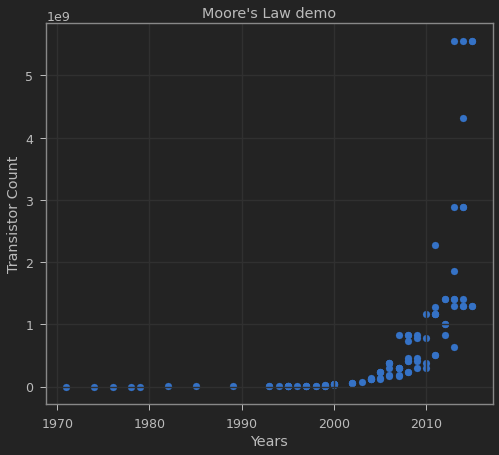

In [5]:
# Create X and Y from the data

X, Y = data.values[:, 0], data.values[:, 1]

# Reshape X and Y of the data

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# Scatter plot the data to get an insigth of the data as follows:

plt.scatter(X, Y)
plt.xlabel("Years")
plt.ylabel("Transistor Count")
plt.title("Moore's Law demo")
plt.show()

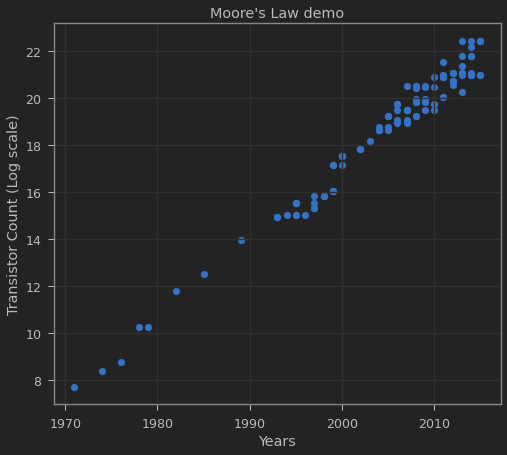

In [6]:
# Convert the data to log-scale to induce linearity into the data
# and thereby fit into our Linear Model

Y = np.log(Y)

plt.scatter(X, Y)
plt.xlabel("Years")
plt.ylabel("Transistor Count (Log scale)")
plt.title("Moore's Law demo")
plt.show()

In [15]:
# Model preparation

# Create the model
model = nn.Linear(1, 1)

# Create the cost function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.07)

# Create torch tensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [16]:
# train the model

epochs = 100

losses = []

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Track the loss
    losses.append(loss)
    
    # Backward and optimizer step
    loss.backward()
    optimizer.step()
    
    
    print("Epoch : {}/{} Loss: {:.4f}".format(epoch, epochs, loss.item()))

Epoch : 0/100 Loss: 574108.6875
Epoch : 1/100 Loss: 3704483380985856.0000
Epoch : 2/100 Loss: 23903807479546900851458048.0000
Epoch : 3/100 Loss: 154243367486832669035551201112883200.0000
Epoch : 4/100 Loss: inf
Epoch : 5/100 Loss: inf
Epoch : 6/100 Loss: inf
Epoch : 7/100 Loss: inf
Epoch : 8/100 Loss: inf
Epoch : 9/100 Loss: nan
Epoch : 10/100 Loss: nan
Epoch : 11/100 Loss: nan
Epoch : 12/100 Loss: nan
Epoch : 13/100 Loss: nan
Epoch : 14/100 Loss: nan
Epoch : 15/100 Loss: nan
Epoch : 16/100 Loss: nan
Epoch : 17/100 Loss: nan
Epoch : 18/100 Loss: nan
Epoch : 19/100 Loss: nan
Epoch : 20/100 Loss: nan
Epoch : 21/100 Loss: nan
Epoch : 22/100 Loss: nan
Epoch : 23/100 Loss: nan
Epoch : 24/100 Loss: nan
Epoch : 25/100 Loss: nan
Epoch : 26/100 Loss: nan
Epoch : 27/100 Loss: nan
Epoch : 28/100 Loss: nan
Epoch : 29/100 Loss: nan
Epoch : 30/100 Loss: nan
Epoch : 31/100 Loss: nan
Epoch : 32/100 Loss: nan
Epoch : 33/100 Loss: nan
Epoch : 34/100 Loss: nan
Epoch : 35/100 Loss: nan
Epoch : 36/100 Los

## Observation

As we can see that the above model suffers an infinite loss and then a nan. This suggest that the model has become corrupted because of the large values in the X in comparison to Y. Thereby we need to normalize the data to avoid such scenarios occuring